# COLOR SEGMENTATION

Color segmentation, also known as color-based image segmentation, is a computer vision technique that involves dividing an image into different regions based on their color properties. In other words, it is a process of identifying and isolating regions in an image based on their color values.

The basic idea behind color segmentation is that regions in an image that have similar color properties can be grouped together. This can be useful for a wide range of applications, such as object recognition, image processing, and computer vision tasks.

There are different approaches to color segmentation, but the most common one is based on clustering. This involves grouping pixels in an image based on their color properties and assigning them to different color clusters. The number of clusters is usually determined based on the number of distinct colors present in the image.

Once the pixels have been grouped into color clusters, the next step is to assign each pixel to the appropriate region based on its cluster. This can be done using various algorithms, such as thresholding or region growing.

Color segmentation can be a powerful tool for image processing and computer vision applications. However, it can be challenging in certain situations, such as when the lighting conditions or color variations in the image are not consistent.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/Users/USER/Pictures/cv_validation_data/jpg_3.jpg')
#Change color to RGB (from BGR)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
image.shape

(183, 275, 3)

The image is represented as a 3D array: the first dimension’s size is the height, the second is the width, and the third is the number of color channels, in this case red, green and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green and blue, each between 0.0 and 1.0 (or between 0 and 255 if you use imageio.imread()). Some images may have less channels, such as gray‐ scale images (one channel), or more channels, such as images with an additional alpha channel for transparency, or satellite images which often contain channels for many light frequencies (e.g., infrared).

Text(0.5, 1.0, 'Original image')

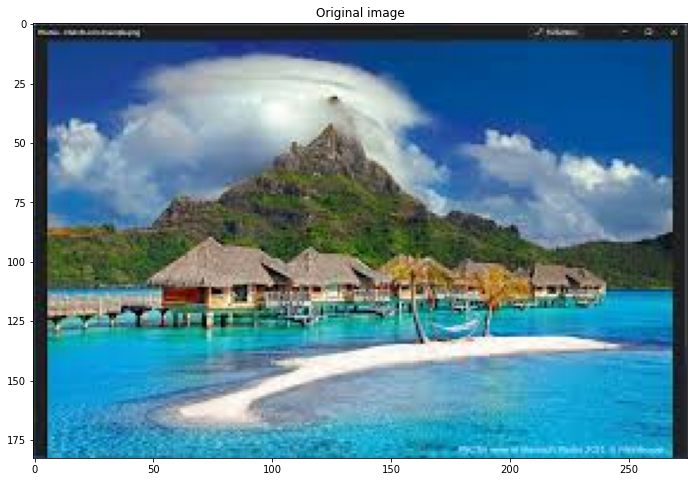

In [4]:
plt.figure(figsize=[12,8])
plt.imshow(image)
plt.title('Original image')

Now we have to prepare the data for K means. The image is a 3-dimensional shape but to apply k-means clustering on it we need to reshape it to a 2-dimensional array.


In [5]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)

pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

<IPython.core.display.Javascript object>

The below line of code sets the criteria for the k-means clustering algorithm to stop running. Specifically, it sets the stopping criteria to be either when 100 iterations have been run or when the required accuracy (epsilon) is reached, which is set to 0.85.

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

The below code performs k-means clustering on the pixel values using the OpenCV cv2.kmeans() function. The k parameter sets the number of clusters to be used in the clustering, and criteria sets the stopping criteria as defined above. The 10 parameter sets the number of times the algorithm should be run with different initial centroids, and cv2.KMEANS_RANDOM_CENTERS specifies that the initial centroids should be chosen randomly.

The retval variable is a float value representing the sum of squared distances of samples to their closest cluster center, and labels is an array of integers specifying the cluster labels for each pixel. The centers variable is an array of floats representing the final cluster centers.

In [7]:
number_of_clusters = 3

return_values, labels, centroids = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

These lines of code convert the cluster centers to 8-bit unsigned integers and use them to assign a color to each pixel based on its cluster label. The labels.flatten() function returns a 1D array of cluster labels for each pixel in the image, which is then used to index into the centers array to get the corresponding color for each pixel.

<IPython.core.display.Javascript object>

Segmented image size: 147.44 KB


Text(0.5, 1.0, 'Image with 3 clusters')

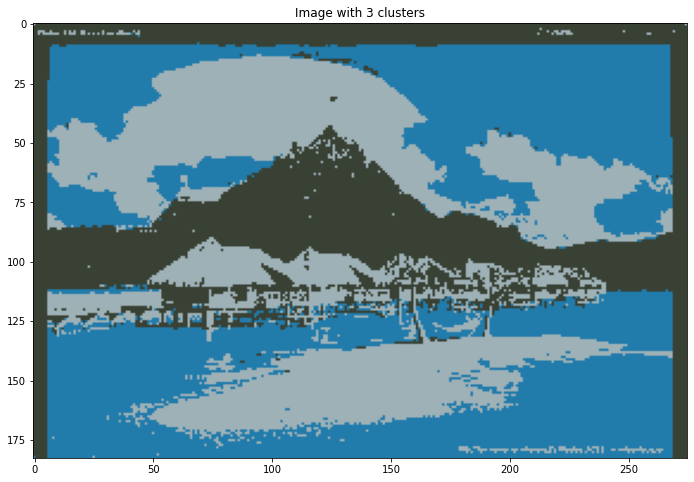

In [8]:
# convert data into 8-bit values
centroids = np.uint8(centroids)
segmented_data = centroids[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Get the size of the segmented image in bytes
size_in_bytes = segmented_image.nbytes

# Convert to kilobytes (KB)
size_in_kb = size_in_bytes / 1024
print("Segmented image size: {:.2f} KB".format(size_in_kb))

plt.figure(figsize=[12,8])
plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Segmented image size: 147.44 KB


Text(0.5, 1.0, 'Image with 9 clusters')

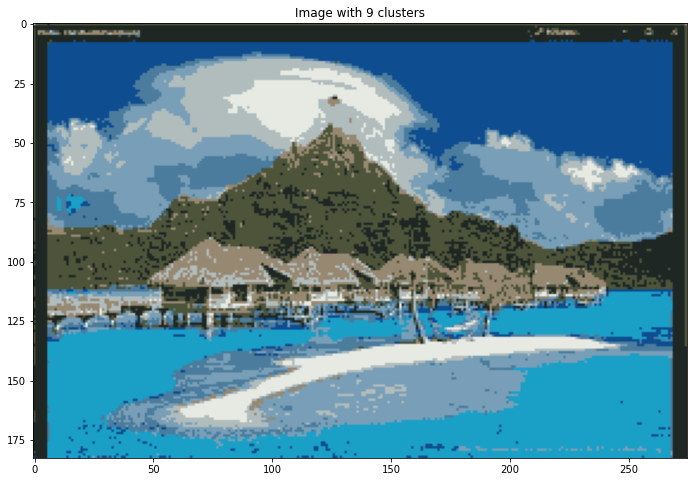

In [13]:
number_of_clusters = 9
retval, labels, centroids = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centroids = np.uint8(centroids)
segmented_data = centroids[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
# Get the size of the segmented image in bytes
size_in_bytes = segmented_image.nbytes

# Convert to kilobytes (KB)
size_in_kb = size_in_bytes / 1024
print("Segmented image size: {:.2f} KB".format(size_in_kb))
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Segmented image size: 147.44 KB


Text(0.5, 1.0, 'Image with 12 clusters')

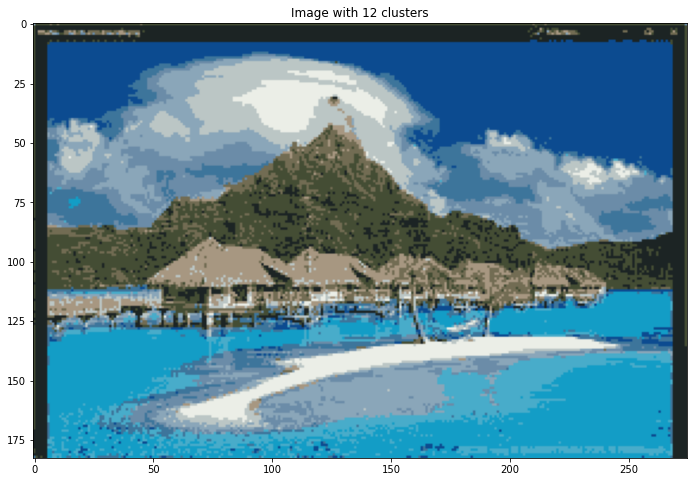

In [14]:
number_of_clusters = 12
retval, labels, centroids = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centroids = np.uint8(centroids)
segmented_data = centroids[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
# Get the size of the segmented image in bytes
size_in_bytes = segmented_image.nbytes

# Convert to kilobytes (KB)
size_in_kb = size_in_bytes / 1024
print("Segmented image size: {:.2f} KB".format(size_in_kb))
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Segmented image size: 147.44 KB


Text(0.5, 1.0, 'Image with 24 clusters')

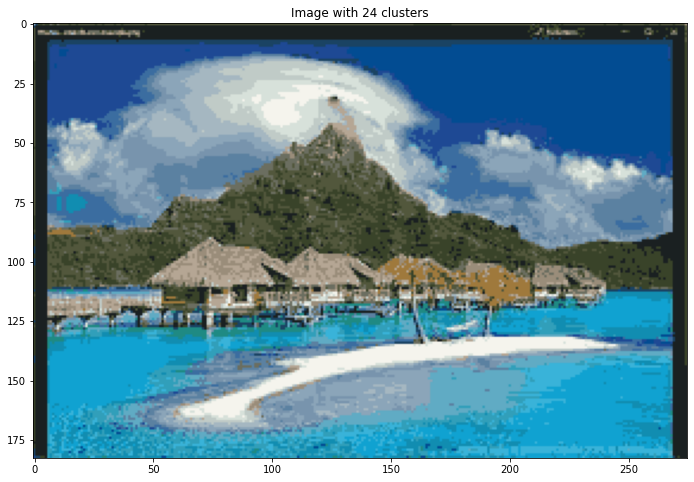

In [15]:
number_of_clusters = 24
retval, labels, centroids = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centroids = np.uint8(centroids)
segmented_data = centroids[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
# Get the size of the segmented image in bytes
size_in_bytes = segmented_image.nbytes

# Convert to kilobytes (KB)
size_in_kb = size_in_bytes / 1024
print("Segmented image size: {:.2f} KB".format(size_in_kb))
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Size in kb: 147.4365234375


Text(0.5, 1.0, 'Image with 36 clusters')

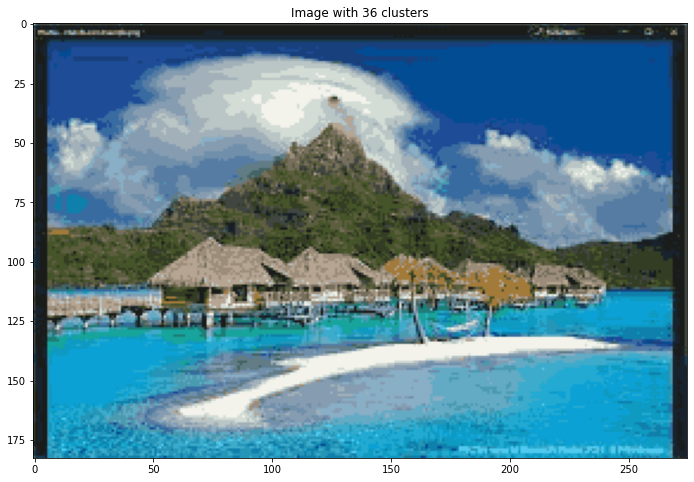

In [18]:
number_of_clusters = 36
retval, labels, centers = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
segmented_size = segmented_image.nbytes

size_in_kb = segmented_size/1024
print(f'Size in kb: {size_in_kb}')
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Size in kb: 147.4365234375


Text(0.5, 1.0, 'Image with 44 clusters')

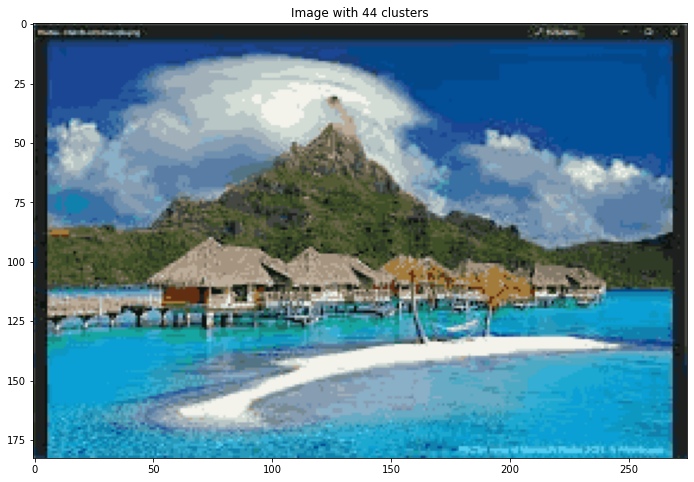

In [19]:
number_of_clusters = 44
retval, labels, centers = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
segmented_size = segmented_image.nbytes

size_in_kb = segmented_size/1024
print(f'Size in kb: {size_in_kb}')
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')

<IPython.core.display.Javascript object>

Size in kb: 147.4365234375


Text(0.5, 1.0, 'Image with 54 clusters')

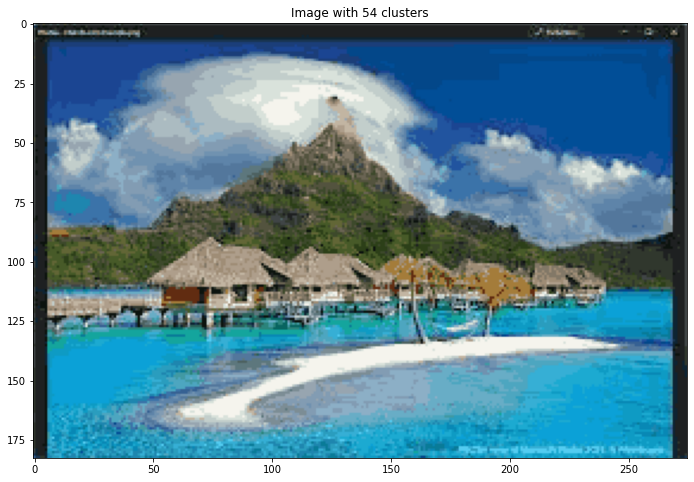

In [20]:
number_of_clusters = 54
retval, labels, centers = cv2.kmeans(pixel_vals, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
segmented_size = segmented_image.nbytes

size_in_kb = segmented_size/1024
print(f'Size in kb: {size_in_kb}')
plt.figure(figsize=[12,8])

plt.imshow(segmented_image)
plt.title(f'Image with {number_of_clusters} clusters')